In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

%matplotlib inline

In [2]:
csv_path = Path('../Project-03/new_teamstats_df.csv')
teamstats_df = pd.read_csv(csv_path)

In [3]:
teamstats_df = teamstats_df.drop(columns=['Unnamed: 0'])

In [4]:
# dropping columns for model tuning

teamstats_df = teamstats_df.drop(columns=['A_H/A',
                                          'H_+/-',
                                          'A_+/-',
                                          'H_PTS',
                                          'A_PTS',
                                          'A_W/L',
                                         'H_FGM',
                                         'A_FGM',
                                         'H_REB',
                                         'A_REB',
                                         'H_FTM',
                                         'A_FTM',
                                         'H_FTA',
                                         'A_FTA'])

In [5]:
teamstats_df.shape

(12738, 188)

In [6]:
teamstats_df.head()

,H_H/A,H_W/L,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,...,A_TEAM2_OKC,A_TEAM2_ORL,A_TEAM2_PHI,A_TEAM2_PHX,A_TEAM2_POR,A_TEAM2_SAC,A_TEAM2_SAS,A_TEAM2_TOR,A_TEAM2_UTA,A_TEAM2_WAS
0,1,1,53,92,45.7,14,28,50.0,59.3,11,...,0,0,0,0,0,0,0,0,0,0
1,1,0,48,80,46.3,10,31,32.3,84.2,7,...,0,0,0,0,0,0,0,0,0,0
2,1,1,48,82,51.2,10,32,31.3,91.7,4,...,0,0,0,0,0,0,0,0,0,0
3,1,0,63,94,38.3,6,22,27.3,67.4,15,...,0,0,0,0,0,0,0,0,0,0
4,1,0,48,68,41.2,10,29,34.5,78.9,8,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(teamstats_df.iloc[:,0:30])

       H_H/A  H_W/L  H_MIN  H_FGA  H_FG%  H_3PM  H_3PA  H_3P%  H_FT%  H_OREB  \
0          1      1     53     92   45.7     14     28   50.0   59.3      11   
1          1      0     48     80   46.3     10     31   32.3   84.2       7   
2          1      1     48     82   51.2     10     32   31.3   91.7       4   
3          1      0     63     94   38.3      6     22   27.3   67.4      15   
4          1      0     48     68   41.2     10     29   34.5   78.9       8   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
12733      1      0     48    100   41.0     10     37   27.0   80.0      15   
12734      1      1     48     88   45.5      9     23   39.1   71.4      11   
12735      1      1     53     96   46.9      4     27   14.8   71.9       3   
12736      1      1     48     94   53.2      9     16   56.3   63.2      10   
12737      1      0     48     86   40.7      5     25   20.0   80.0       9   

       ...  A_3PA  A_3P%  A_FT%  A_OREB

In [8]:
# Creating the X and y sets
X = teamstats_df.iloc[:,0:30].values
y = teamstats_df["H_W/L"].values

In [9]:
X.shape

(12738, 30)

In [10]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [44]:
print(X_test)

[[ 1.  1. 48. ...  8.  2. 15.]
 [ 1.  1. 48. ...  5.  3. 25.]
 [ 1.  0. 48. ... 10.  4. 19.]
 ...
 [ 1.  1. 48. ... 12.  8. 19.]
 [ 1.  0. 48. ... 13.  2. 15.]
 [ 1.  1. 48. ...  6.  4. 23.]]


In [45]:
# Model set-up
number_input_features = 30
hidden_nodes_layer1 = 25
hidden_nodes_layer2 = 8
#hidden_nodes_layer3 = 4
#hidden_nodes_layer4 = 5
#hidden_nodes_layer5 = 5

In [46]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, 
          input_dim=number_input_features, 
          activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))


# Layer 3
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 4
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 5
#model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

In [47]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [48]:
# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 208       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 992
Trainable params: 992
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Training the model
batch_size = 1000
epochs = 50
training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/50
8/8 [==============================] - 8s 293ms/step - loss: 28.2582 - accuracy: 0.5917 - tp: 2779.4444 - tn: 0.0000e+00 - fp: 1923.6667 - fn: 0.0000e+00 - precision: 0.5917 - recall: 1.0000 - auc: 0.5000 - val_loss: 21.9000 - val_accuracy: 0.5676 - val_tp: 1356.0000 - val_tn: 0.0000e+00 - val_fp: 1033.0000 - val_fn: 0.0000e+00 - val_precision: 0.5676 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 18.8097 - accuracy: 0.5868 - tp: 2765.3333 - tn: 0.0000e+00 - fp: 1937.7778 - fn: 0.0000e+00 - precision: 0.5868 - recall: 1.0000 - auc: 0.5000 - val_loss: 12.7727 - val_accuracy: 0.5676 - val_tp: 1356.0000 - val_tn: 0.0000e+00 - val_fp: 1033.0000 - val_fn: 0.0000e+00 - val_precision: 0.5676 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 10.1453 - accuracy: 0.5871 - tp: 2761.6667 - tn: 0.0000e+00 - fp: 1934.5556 - fn: 6.8889 - precision: 0.5877 - recall: 0.9

Epoch 22/50
8/8 [==============================] - 0s 20ms/step - loss: 0.8378 - accuracy: 0.6395 - tp: 1838.0000 - tn: 1182.8889 - fp: 753.4444 - fn: 928.7778 - precision: 0.7069 - recall: 0.6566 - auc: 0.6886 - val_loss: 0.8095 - val_accuracy: 0.6492 - val_tp: 1054.0000 - val_tn: 497.0000 - val_fp: 536.0000 - val_fn: 302.0000 - val_precision: 0.6629 - val_recall: 0.7773 - val_auc: 0.7140
Epoch 23/50
8/8 [==============================] - 0s 15ms/step - loss: 0.7848 - accuracy: 0.6685 - tp: 2139.3333 - tn: 1001.3333 - fp: 906.0000 - fn: 656.4444 - precision: 0.7034 - recall: 0.7720 - auc: 0.7078 - val_loss: 0.7382 - val_accuracy: 0.6769 - val_tp: 944.0000 - val_tn: 673.0000 - val_fp: 360.0000 - val_fn: 412.0000 - val_precision: 0.7239 - val_recall: 0.6962 - val_auc: 0.7310
Epoch 24/50
8/8 [==============================] - 0s 15ms/step - loss: 0.7396 - accuracy: 0.6723 - tp: 1928.1111 - tn: 1242.5556 - fp: 714.0000 - fn: 818.4444 - precision: 0.7271 - recall: 0.6924 - auc: 0.7276 - va

Epoch 43/50
8/8 [==============================] - 0s 19ms/step - loss: 0.3304 - accuracy: 0.8549 - tp: 2473.6667 - tn: 1551.4444 - fp: 379.5556 - fn: 298.4444 - precision: 0.8666 - recall: 0.8909 - auc: 0.9313 - val_loss: 0.3193 - val_accuracy: 0.8635 - val_tp: 1231.0000 - val_tn: 832.0000 - val_fp: 201.0000 - val_fn: 125.0000 - val_precision: 0.8596 - val_recall: 0.9078 - val_auc: 0.9390
Epoch 44/50
8/8 [==============================] - 0s 14ms/step - loss: 0.3218 - accuracy: 0.8627 - tp: 2477.0000 - tn: 1578.5556 - fp: 345.8889 - fn: 301.6667 - precision: 0.8778 - recall: 0.8918 - auc: 0.9354 - val_loss: 0.3123 - val_accuracy: 0.8665 - val_tp: 1246.0000 - val_tn: 824.0000 - val_fp: 209.0000 - val_fn: 110.0000 - val_precision: 0.8564 - val_recall: 0.9189 - val_auc: 0.9432
Epoch 45/50
8/8 [==============================] - 0s 13ms/step - loss: 0.3134 - accuracy: 0.8677 - tp: 2484.4444 - tn: 1599.6667 - fp: 349.0000 - fn: 270.0000 - precision: 0.8728 - recall: 0.9056 - auc: 0.9400 - v

<AxesSubplot:title={'center':'Loss'}, xlabel='Epoch'>

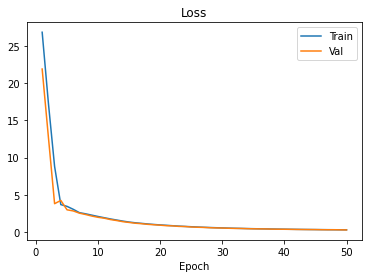

In [50]:
# Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

<AxesSubplot:title={'center':'Accuracy'}, xlabel='Epoch'>

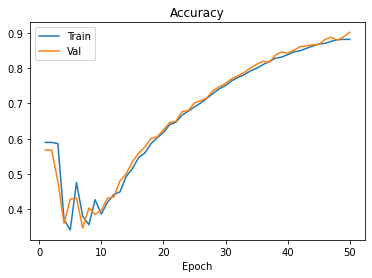

In [51]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

<AxesSubplot:title={'center':'AUC'}, xlabel='Epoch'>

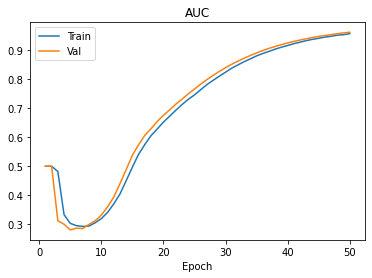

In [52]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [53]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [54]:
# Making predictions to feed the roc_curve module
train_predictions = model.predict(X_train, batch_size=1000)
test_predictions = model.predict(X_test, batch_size=1000)

In [55]:
# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)

In [56]:
# Create a DataFrame with the fpr and tpr results
roc_df_train = pd.DataFrame({"FPR Train": fpr_train, "TPR Train": tpr_train,})

roc_df_test = pd.DataFrame({"FPR Test": fpr_test, "TPR Test": tpr_test,})

<AxesSubplot:title={'center':'Test ROC Curve (AUC=0.9641)'}, xlabel='FPR Test'>

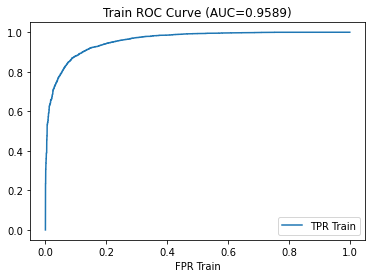

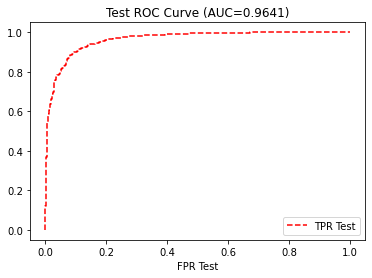

In [57]:
# Plotting the ROC Curves
roc_df_train.plot(
    x="FPR Train",
    y="TPR Train",
    xlim=([-0.05, 1.05]),
    title=f"Train ROC Curve (AUC={auc_train})",
)

roc_df_test.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test})",
)

In [58]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 0.25931259989738464,
 'accuracy': 0.9004709720611572,
 'tp': 1661.0,
 'tn': 1207.0,
 'fp': 139.0,
 'fn': 178.0,
 'precision': 0.9227777719497681,
 'recall': 0.9032082557678223,
 'auc': 0.9641428589820862}

In [59]:
# Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted,Positive (1),Negative (0)
Actual,,
Positive(1),TP=1661.0,FN=139.0
Negative(0),FP=178.0,TN=1207.0


In [60]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = model.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1385
           1       0.90      0.92      0.91      1800

    accuracy                           0.90      3185
   macro avg       0.90      0.90      0.90      3185
weighted avg       0.90      0.90      0.90      3185



In [61]:
model.predict(X_test)

array([[0.99197286],
       [0.6535458 ],
       [0.00226623],
       ...,
       [0.92711794],
       [0.10899314],
       [0.37346947]], dtype=float32)